**Importing Skin Cancer Data**

**To do: Take necessary actions to read the data**

**Importing all the important libraries**

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
''' train_ds have totle 2239
    test_ds have totle 118 files
    totle =2357 files , and train and test have 9 classe
'''

' train_ds have totle 2239\n    test_ds have totle 118 files \n    totle =2357 files , and train and test have 9 classe \n'

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.


Create a dataset

Define some parameters for the loader:

In [3]:
batch_size = 32
img_height = 180
img_width = 180
channels = 3

Use 80% of the images for training, and 20% for validation.

In [4]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train',
    shuffle =True ,
    image_size =(img_height,img_width)  , # image_size =(180,180,3)
    batch_size = batch_size             # 32
)

Found 2239 files belonging to 9 classes.


In [5]:
len(train_ds)

70

The totle files is 2239 and btach_size is 32

totole_batch = (2239/32) ~ 70

its mean 70 iteration

In [6]:
# train dataset belong classe name
train_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [7]:
# test_data
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test',
    shuffle =True ,
    image_size =(img_height,img_width)  , # image_size = (180,180,3)
    batch_size = batch_size             # 32
)

Found 118 files belonging to 9 classes.


The totle files is 118 and btach_size is 32

totole_batch = (118/32) ~ 4

its mean 4 iteration

In [8]:
len(val_ds)

4

In [9]:
# test dataset belong classe name
val_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [10]:
# this is tensore form because multidimension data
val_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
# convert simple form
# fetch 1 batch , 1 batch have 32 files
for image_batch , lable_batch in val_ds.take(1) :
    print('this is one batch shape :',image_batch.shape)  # (batch_size,img_height,img_width,chanells)
    print('this is lable shape :',lable_batch.shape)

this is one batch shape : (32, 180, 180, 3)
this is lable shape : (32,)


In [12]:
# normal formn
for image_batch , label_batch in train_ds.take(1):
    print(image_batch.numpy())
    print('\n')
    print('convergt the lable in numeric : ',label_batch.numpy())

[[[[5.51250000e+01 3.49583359e+01 2.68333321e+01]
   [6.15000000e+01 4.22500000e+01 3.31250000e+01]
   [6.71666718e+01 4.34583359e+01 3.77083359e+01]
   ...
   [5.92498779e+01 3.44582214e+01 2.43330688e+01]
   [6.80000000e+01 4.40000000e+01 4.16250000e+01]
   [6.14166870e+01 4.01666870e+01 4.19999695e+01]]

  [[6.10416679e+01 3.79166679e+01 3.32083359e+01]
   [6.81250000e+01 4.66250000e+01 3.88750000e+01]
   [7.53333282e+01 4.99583359e+01 4.25833321e+01]
   ...
   [6.94162598e+01 4.34998169e+01 3.67914124e+01]
   [7.33750000e+01 4.16250000e+01 3.60000000e+01]
   [6.35834045e+01 4.17916412e+01 3.66249542e+01]]

  [[6.57916641e+01 4.37083359e+01 3.42916641e+01]
   [7.51250000e+01 4.66250000e+01 4.17500000e+01]
   [8.11666641e+01 5.30416641e+01 4.90416641e+01]
   ...
   [8.24582825e+01 5.72501221e+01 5.04168091e+01]
   [7.65000000e+01 4.68750000e+01 4.38750000e+01]
   [7.01666870e+01 4.45000000e+01 4.35833130e+01]]

  ...

  [[4.50000000e+01 2.10000000e+01 1.99166660e+01]
   [4.10000000e+

In [13]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These class_names = orrespond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
n_classes = len(class_names)
print(n_classes)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


**Visualize the data**

Todo, create a code to visualize one instance of all the nine classes present in the dataset

(32, 180, 180, 3)
[1 4 3 4 1 1 6 3 5 3 1 0 5 5 5 4 3 3 1 6 3 4 7 3 5 8 3 5 1 7 5 3]


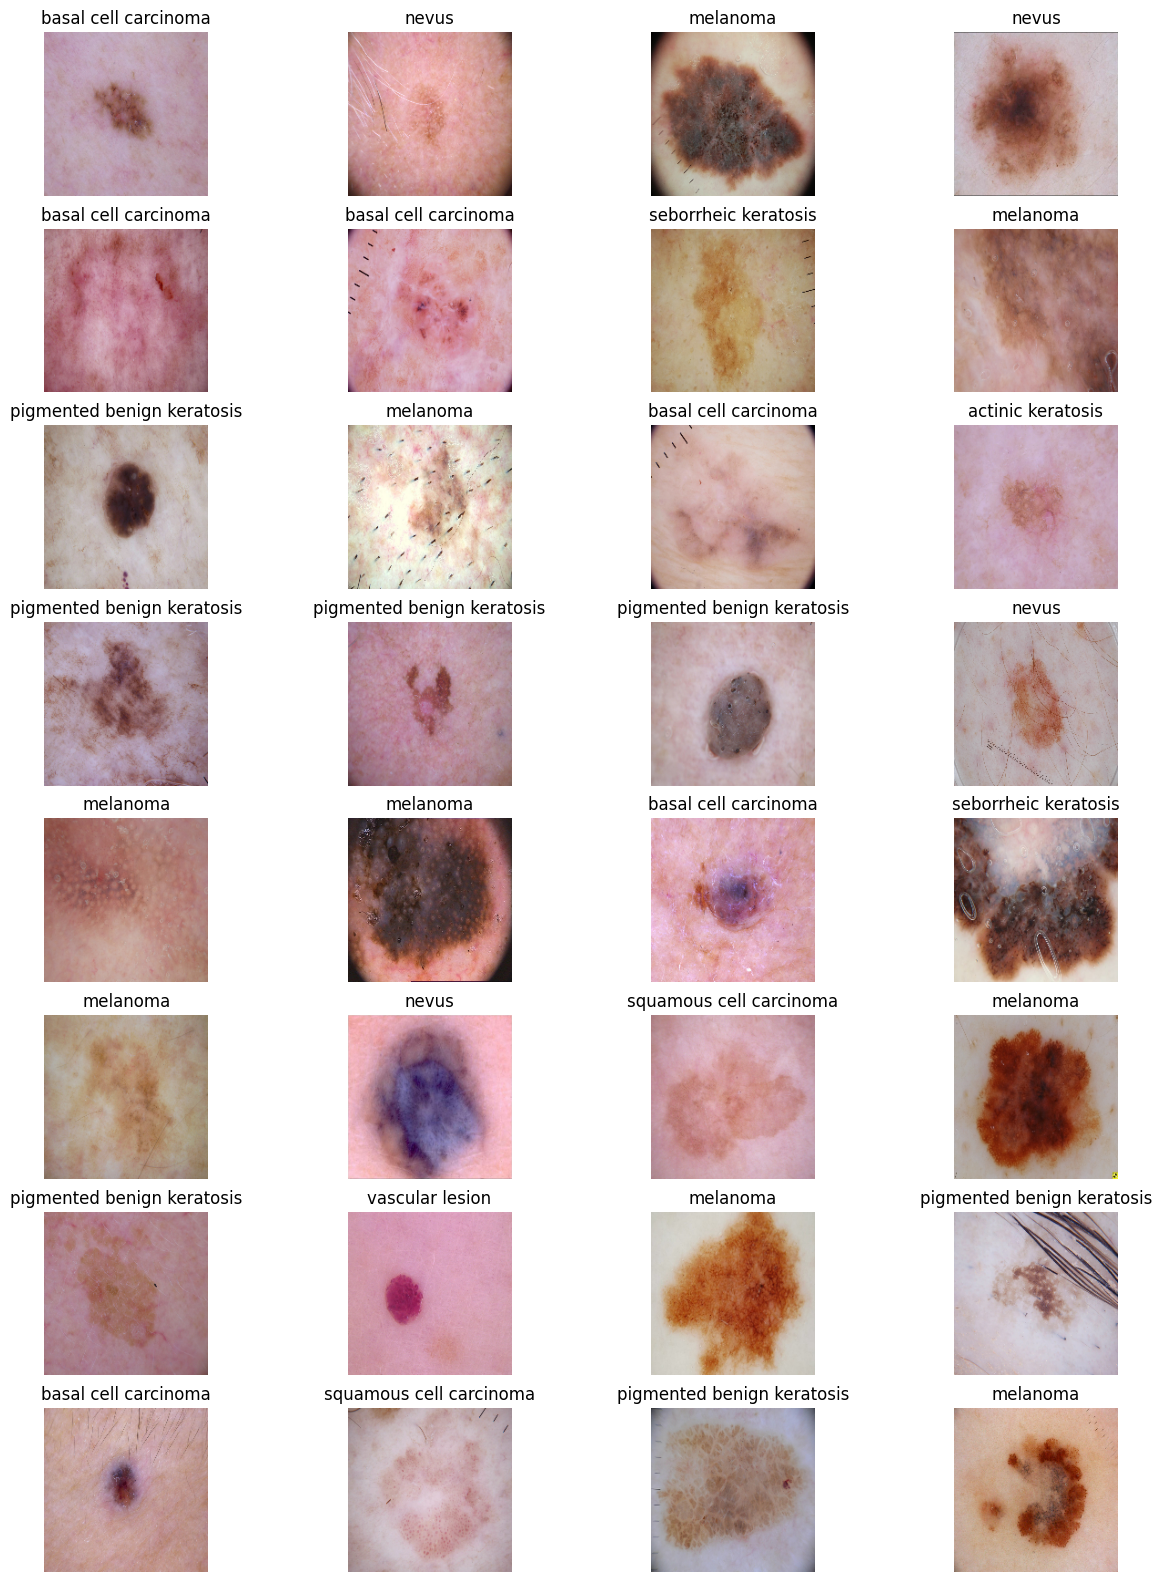

In [14]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(15,20))
for image_batch , labels_batch in train_ds.take(1):
  print(image_batch.shape)
  print(labels_batch.numpy())
  for i in range(32):
    plt.subplot(8,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[labels_batch[i]])
    plt.axis('off')

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [15]:
# incress the perfomance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [16]:
# resize and rescale the value
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [17]:
# data augmentation

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)
])

**Create the model**

Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [18]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D ,BatchNormalization

In [19]:
input_shape = (batch_size , img_height , img_width , channels)

In [20]:
# create CNN model

model = Sequential()


model.add(resize_and_rescale)

model.add(data_augmentation)

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=input_shape))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(32,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.10))

model.add(Dense(n_classes))

**Compile the model**

Choose an appropirate optimiser and loss function for model training

In [21]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.build(input_shape)

In [23]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 180, 180, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 180, 180, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 180, 180, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (32, 180, 180, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (32, 90, 90, 64)          0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (32, 90, 90, 64)          36928     
                                                      

**Train the model**

In [24]:
epochs = 5

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
70/70 [==============================] - 457s 4s/step - loss: 2.0979 - accuracy: 0.1961 - val_loss: 2.1844 - val_accuracy: 0.1949
Epoch 2/5
70/70 [==============================] - 251s 4s/step - loss: 1.9355 - accuracy: 0.2769 - val_loss: 2.2152 - val_accuracy: 0.1610
Epoch 3/5
70/70 [==============================] - 264s 4s/step - loss: 1.7911 - accuracy: 0.3305 - val_loss: 2.1685 - val_accuracy: 0.2542
Epoch 4/5
70/70 [==============================] - 256s 4s/step - loss: 1.6768 - accuracy: 0.3984 - val_loss: 2.0669 - val_accuracy: 0.3559
Epoch 5/5
70/70 [==============================] - 262s 4s/step - loss: 1.6315 - accuracy: 0.4319 - val_loss: 2.0380 - val_accuracy: 0.3390


In [25]:
# accuracy of model each epochs
history.history['accuracy']

[0.19606967270374298,
 0.27690932154655457,
 0.3305046856403351,
 0.3983921408653259,
 0.43188923597335815]

In [26]:
# validation accuracy of model each epochs
history.history['val_accuracy']

[0.19491524994373322,
 0.16101695597171783,
 0.2542372941970825,
 0.35593220591545105,
 0.33898305892944336]

In [27]:
# lost
history.history['loss']

[2.0978598594665527,
 1.935523509979248,
 1.791137933731079,
 1.676823377609253,
 1.6315438747406006]

**Visualizing training results**

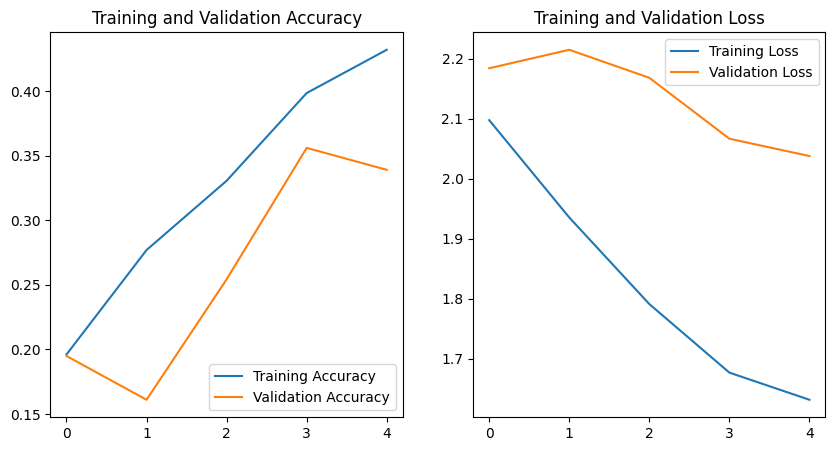

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit**

Traning-accuracy = 48 and

validation-accuracy = 37

this is underfit model not good acurracy of traning and validation dataset


**Write your findings here**

In [29]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

# data augmentation


data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
  ]
)

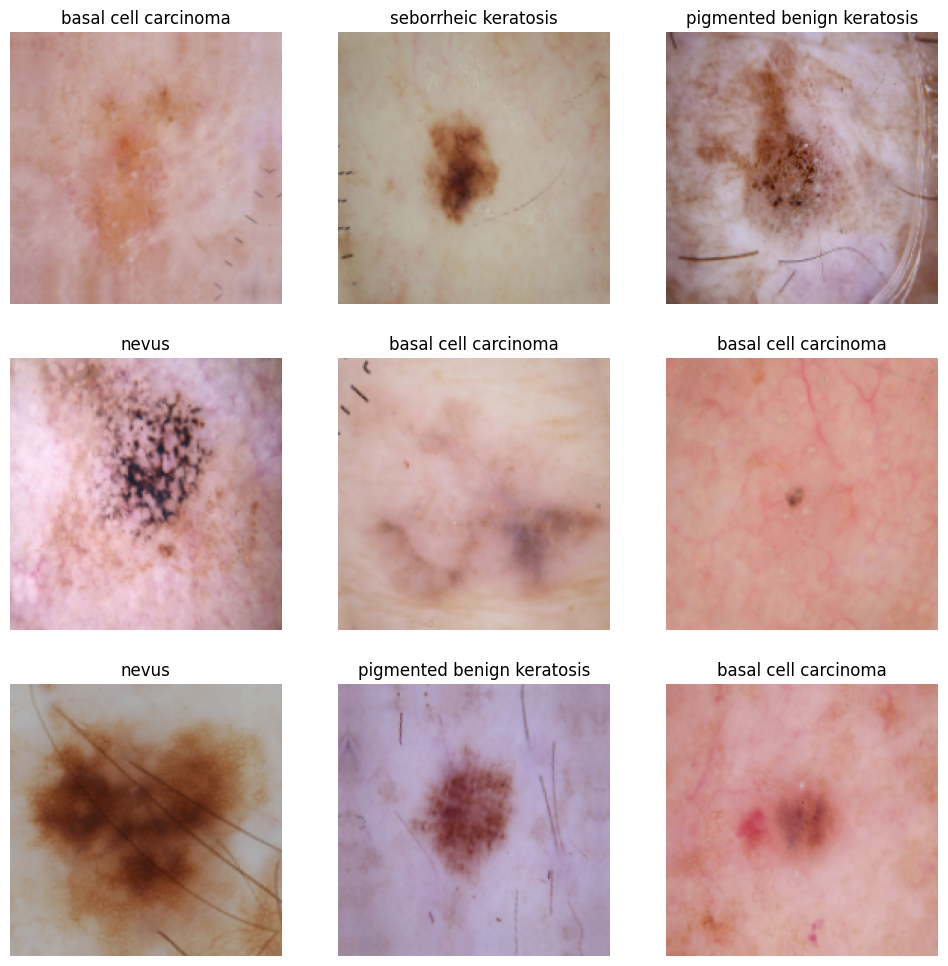

In [30]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Todo:

**Create the model, compile and train the model**

In [31]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential()

model.add(data_augmentation)

model.add(resize_and_rescale)

model.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))


model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))


model.add(MaxPooling2D(2,2))

model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(n_classes))

**Compiling the model**

In [32]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Training the model**

In [33]:
## Your code goes here, note: train your model for 20 epochs
epochs = 5

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
70/70 [==============================] - 58s 773ms/step - loss: 2.0936 - accuracy: 0.2153 - val_loss: 2.2965 - val_accuracy: 0.1271
Epoch 2/5
70/70 [==============================] - 54s 773ms/step - loss: 1.8581 - accuracy: 0.3122 - val_loss: 2.3664 - val_accuracy: 0.1864
Epoch 3/5
70/70 [==============================] - 54s 768ms/step - loss: 1.6412 - accuracy: 0.4212 - val_loss: 2.6546 - val_accuracy: 0.2203
Epoch 4/5
70/70 [==============================] - 55s 775ms/step - loss: 1.4753 - accuracy: 0.4859 - val_loss: 2.2361 - val_accuracy: 0.2797
Epoch 5/5
70/70 [==============================] - 55s 787ms/step - loss: 1.4011 - accuracy: 0.5087 - val_loss: 2.0493 - val_accuracy: 0.3729


**Visualizing the results**

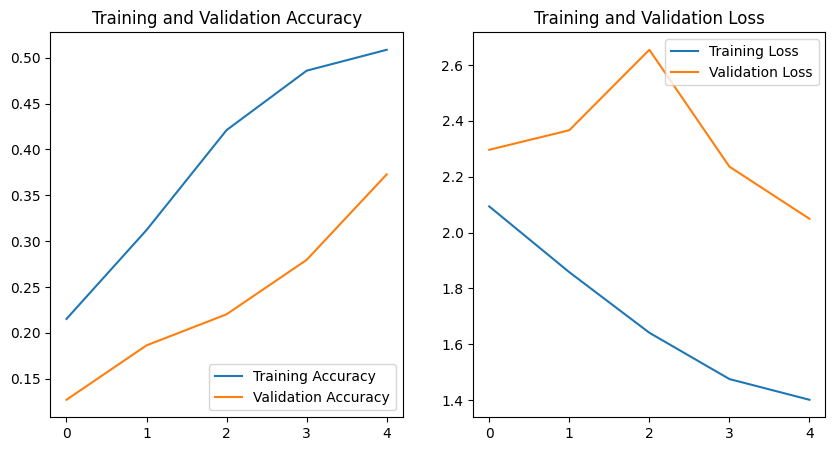

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?**

This model like underfiting beacuse

Traning accuracy = 51 and

Validation accuracy = 38

**Todo:** Find the distribution of classes in the training dataset.

**Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [35]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [36]:
data_dir_train = pathlib.Path(r"/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

In [37]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


In [38]:
#plot number of images in each Class
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))

In [39]:
count

[114, 376, 95, 438, 357, 462, 77, 181, 139]

<BarContainer object of 9 artists>

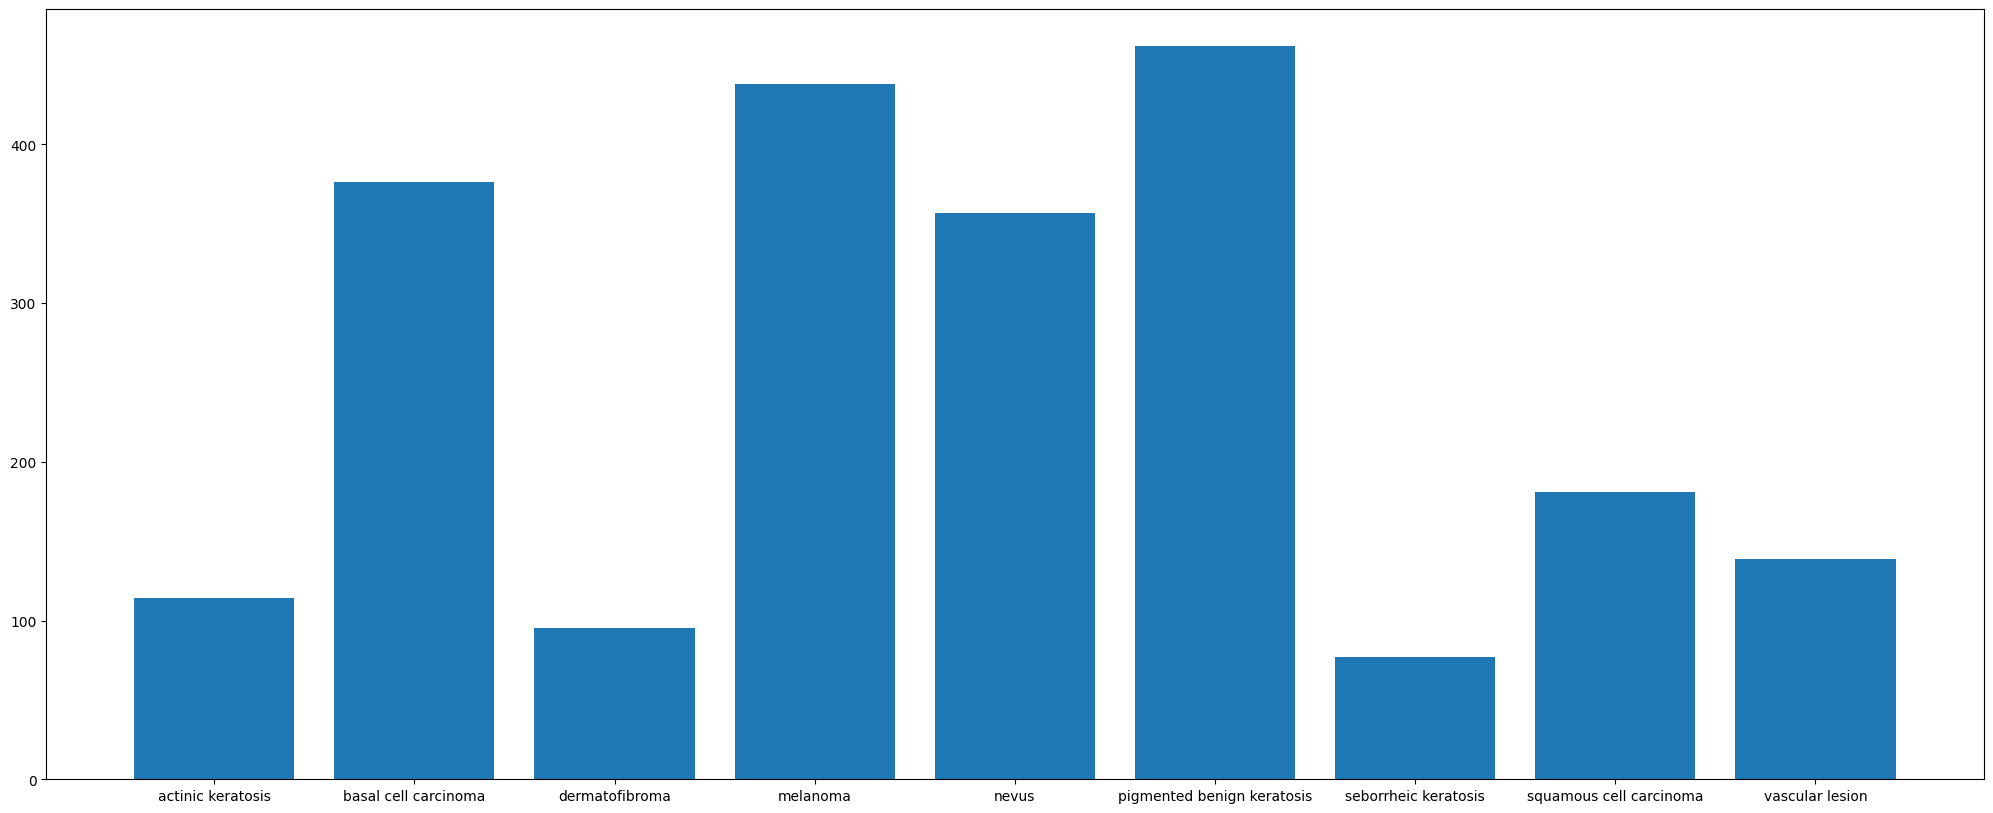

In [40]:
#plot number of images in each Class
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

Todo: Write your findings here:

- Which class has the least number of samples?
- Which classes dominate the data in terms proportionate number of samples?
Todo: Rectify the class imbalance

Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [41]:
!pip install Augmentor

Defaulting to user installation because normal site-packages is not writeable
Collecting Augmentor
  Downloading Augmentor-0.2.12-py2.py3-none-any.whl (38 kB)
Requirement already satisfied: tqdm>=4.9.0 in c:\programdata\anaconda3\lib\site-packages (from Augmentor) (4.64.1)
Requirement already satisfied: numpy>=1.11.0 in c:\users\user\appdata\roaming\python\python39\site-packages (from Augmentor) (1.23.5)
Requirement already satisfied: Pillow>=5.2.0 in c:\programdata\anaconda3\lib\site-packages (from Augmentor) (9.2.0)
Requirement already satisfied: colorama in c:\programdata\anaconda3\lib\site-packages (from tqdm>=4.9.0->Augmentor) (0.4.5)
Installing collected packages: Augmentor
Successfully installed Augmentor-0.2.12
To use Augmentor, the following general procedure is followed:

Instantiate a Pipeline object pointing to a directory containing your initial image data set.
Define a number of operations to perform on this data set using your Pipeline object.
Execute these operations by calling the Pipeline’s sample() method.

In [42]:
path_to_training_dataset=str(data_dir_train)+'/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C24A4E064D0>: 100%|██████████| 500/500 [00:17<00:00, 29.30 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7C24A4E0BD00>: 100%|██████████| 500/500 [00:14<00:00, 33.96 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C24A50F2E90>: 100%|██████████| 500/500 [00:14<00:00, 33.90 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C24A7F03CD0>: 100%|██████████| 500/500 [01:03<00:00,  7.85 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7C24AAC19630>: 100%|██████████| 500/500 [00:57<00:00,  8.69 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C24A510F8E0>: 100%|██████████| 500/500 [00:14<00:00, 34.65 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C24BAC66AD0>: 100%|██████████| 500/500 [00:29<00:00, 17.02 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C24B814CA00>: 100%|██████████| 500/500 [00:14<00:00, 34.26 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C24AAF866E0>: 100%|██████████| 500/500 [00:14<00:00, 34.49 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [43]:
#Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types..
#Lets take a look at total count of augmented images.

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


**Lets see the distribution of augmented data after adding new images to the original training data.**

<BarContainer object of 9 artists>

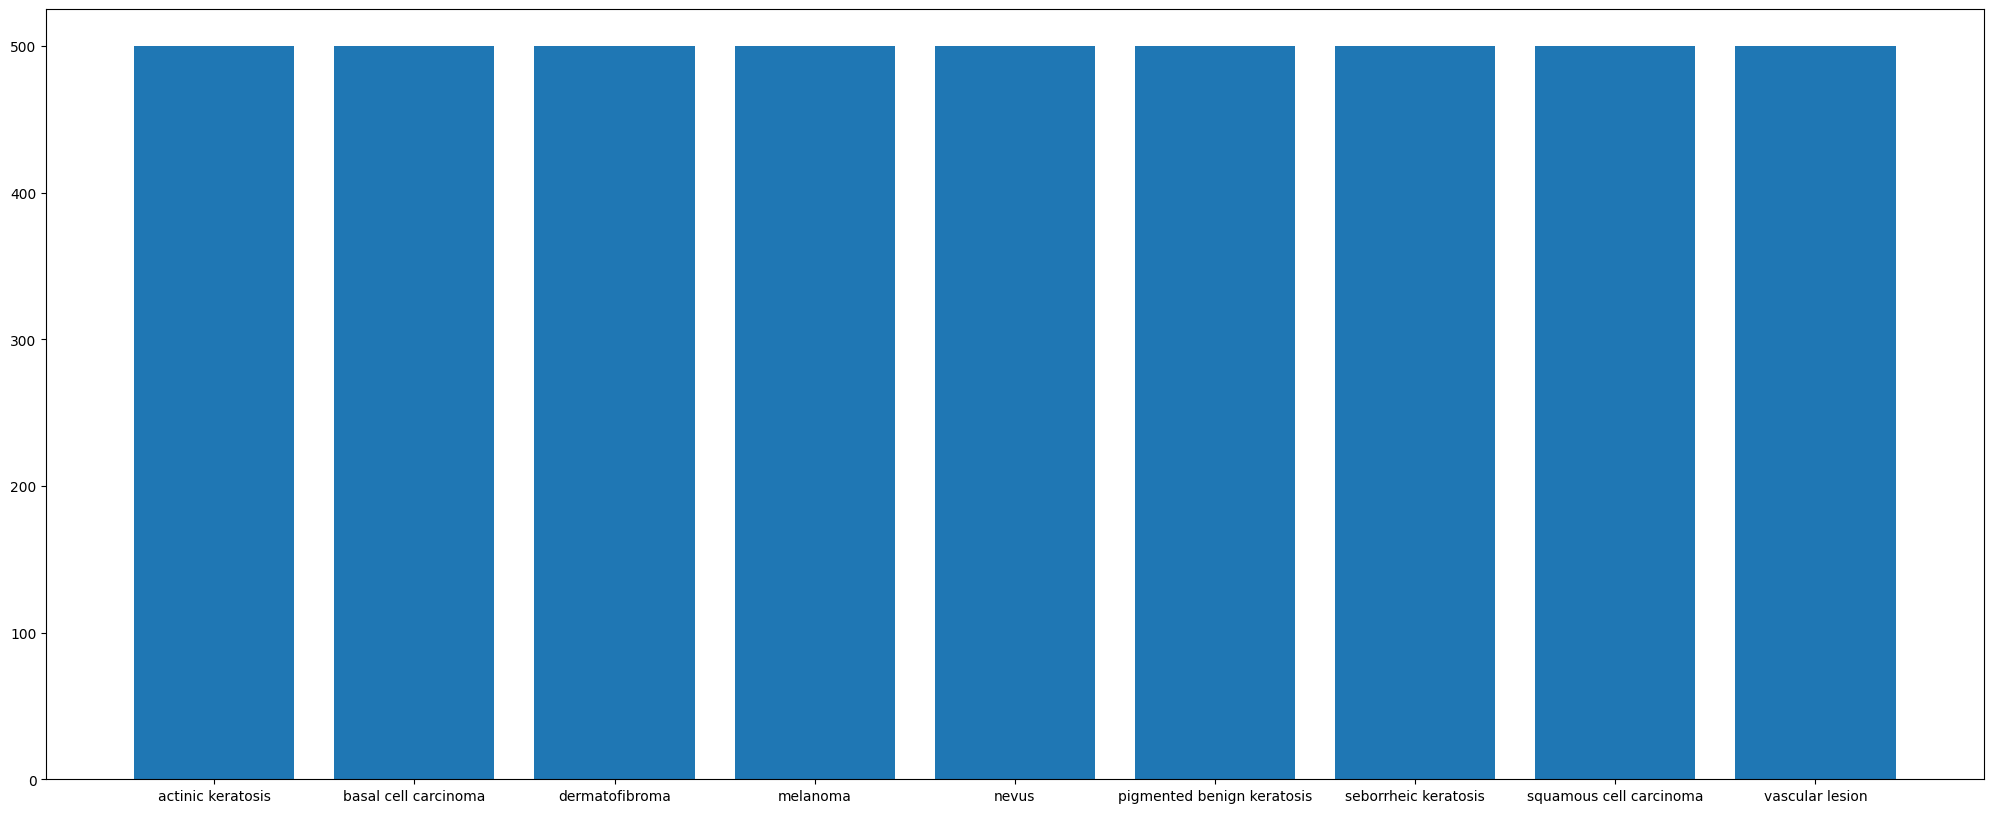

In [44]:
# Check the distribution of data again.
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'*/output/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

**Lets see the distribution of augmented data after adding new images to the original training data.**

In [45]:
import os
from glob import glob

In [48]:
import os
from glob import glob

# Define the directory where you want to search for JPG files
data_dir_train = '/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train'

# Use glob to create a list of file paths for JPG files
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

# Now, path_list_new contains the list of file paths for JPG files in the specified directory

In [49]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [50]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [52]:
from pathlib import Path
import pandas as pd

# Define the base directory where your image folders are located
base_dir = '/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train'

# List of class names
class_names = ['class1', 'class2', 'class3']  # Replace with your actual class names

path_list = []
lesion_list = []

# Iterate over class names and collect file paths
for name in class_names:
    # Create a Path object for the class directory
    class_dir = Path(base_dir) / name
    for file in class_dir.glob('*.jpg'):
        path_list.append(str(file))
        lesion_list.append(name)

# Create a dictionary from the lists and convert it to a DataFrame
dataframe_dict_original = {'Path': path_list, 'Label': lesion_list}
original_df = pd.DataFrame(dataframe_dict_original)

In [53]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-53-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [54]:
new_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

**Todo:** Train the model on the data created using Augmentor

In [55]:
batch_size = 32
img_height = 180
img_width = 180

**Todo:** Create a training dataset

In [56]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


**Todo:** Create a validation dataset

In [57]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


**Todo:** Create your model (make sure to include normalization)

In [58]:
## your code goes here
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(n_classes)
])

**Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [59]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Todo:** Train your model

In [60]:
epochs = 15

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
169/169 [==============================] - 161s 781ms/step - loss: 1.7623 - accuracy: 0.3201 - val_loss: 1.4422 - val_accuracy: 0.4595
Epoch 2/15
169/169 [==============================] - 116s 687ms/step - loss: 1.3793 - accuracy: 0.4803 - val_loss: 1.4708 - val_accuracy: 0.4796
Epoch 3/15
169/169 [==============================] - 119s 703ms/step - loss: 1.1288 - accuracy: 0.5784 - val_loss: 1.0768 - val_accuracy: 0.6162
Epoch 4/15
169/169 [==============================] - 119s 706ms/step - loss: 0.9584 - accuracy: 0.6560 - val_loss: 0.9424 - val_accuracy: 0.6622
Epoch 5/15
169/169 [==============================] - 117s 692ms/step - loss: 0.7595 - accuracy: 0.7226 - val_loss: 0.9615 - val_accuracy: 0.6563
Epoch 6/15
169/169 [==============================] - 121s 714ms/step - loss: 0.6240 - accuracy: 0.7771 - val_loss: 0.8380 - val_accuracy: 0.7075
Epoch 7/15
169/169 [==============================] - 120s 713ms/step - loss: 0.4893 - accuracy: 0.8212 - val_loss: 0.8725 -

**Todo:** Visualize the model results

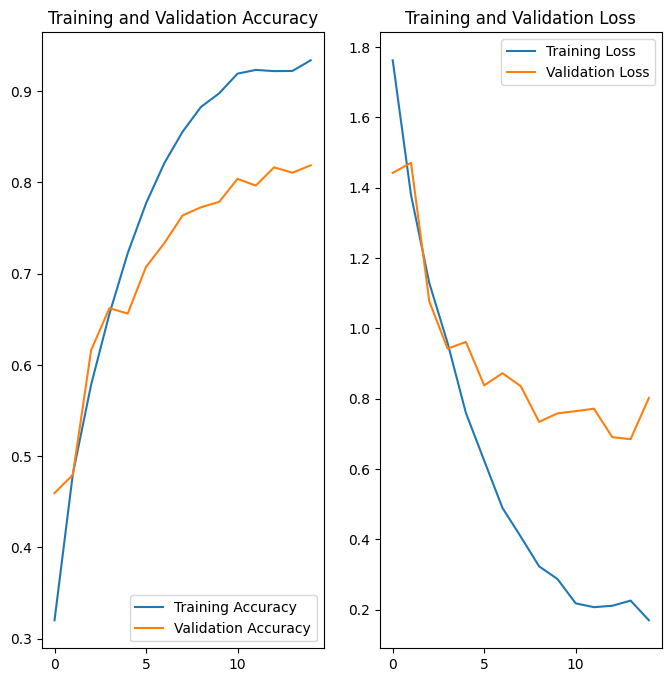

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

This is good

Traning Accuracy = 92

Validation Accuracy = 80